In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import sys
import json

In [2]:
def get_number(file_path): # function to get the number of the pandemic
    return file_path.split('_')[-2] + '_' + file_path.split('_')[-1].split('.')[0]

In [3]:
def get_code(file_path): # function that returns 'number of day of prediction' + '_' + 'number of pandemic'
    return get_number(file_path) + '_' + file_path.split('_')[1]

In [4]:
def get_pandemic(file_path): # get the np.array(n_hospitalized) of the pandemic
    pandemic = pd.read_csv('./all_pandemics/pandemic_'+get_number(file_path)+'.csv')
    pandemic.drop(columns=['Unnamed: 0'],inplace=True)
    return np.array(pandemic.iloc[0])

In [5]:
def get_Rvalue(file_path): # get the np.array(n_hospitalized) of the pandemic
    pandemic = pd.read_csv('./all_pandemics/pandemic_'+get_number(file_path)+'.csv')
    pandemic.drop(columns=['Unnamed: 0'],inplace=True)
    return np.array(pandemic.iloc[3])

In [53]:
#Calculating coefficient of variation and MAPE using the Median Ensemble
names = [name for name in os.listdir('./results/predictions_of_the_models/') if 'predictions' in name and 's_7' in name]
all_cvs=dict()
all_mapes=dict() 
for name in names: # building the list of all stds
    predictions=pd.read_csv('./results/predictions_of_the_models/'+name) 
    predictions.index=[20*i for i in range(1,predictions.shape[0]+1)]
    predictions.drop(columns=['Unnamed: 0'],inplace=True)
    real_values=np.array(predictions['Real values'])
    cvs=np.array([np.std(predictions.iloc[i])/np.mean(predictions.iloc[i]) for i in range(predictions.shape[0])])
    mapes=np.array([np.abs(np.median(predictions.iloc[i]) - real_values[i])/real_values[i] for i in range(predictions.shape[0])])
    all_cvs[get_code(name)] = list(cvs)
    all_mapes[get_code(name)]=list(mapes)

/var/folders/vq/kbhqcbz52js6b8nz5zvnryc1fy9f2x/T/ipykernel_55014/377222413.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  mapes=np.array([np.abs(np.median(predictions.iloc[i]) - real_values[i])/real_values[i] for i in range(predictions.shape[0])])
/var/folders/vq/kbhqcbz52js6b8nz5zvnryc1fy9f2x/T/ipykernel_55014/377222413.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  mapes=np.array([np.abs(np.median(predictions.iloc[i]) - real_values[i])/real_values[i] for i in range(predictions.shape[0])])
/var/folders/vq/kbhqcbz52js6b8nz5zvnryc1fy9f2x/T/ipykernel_55014/377222413.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  mapes=np.array([np.abs(np.median(predictions.iloc[i]) - real_values[i])/real_values[i] for i in range(predictions.shape[0])])
/var/folders/vq/kbhqcbz52js6b8nz5zvnryc1fy9f2x/T/ipykernel_55014/377222413.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  mapes=np.array([np.abs(np.median(predictions.i

In [54]:
with open('./results/cvs_of_the_models.json', 'w') as f: # writing the results
    json.dump(all_cvs, f)
with open('./results/rmse_of_the_ensemble.json', 'w') as f: # writing the results
    json.dump(all_mapes, f)


In [55]:
with open('./results/cvs_of_the_models.json', 'r') as f: # reading the file containing all stds list
    all_cvs = json.load(f)
with open('./results/rmse_of_the_ensemble.json', 'r') as f: # reading the file containing all stds list
    all_mapes = json.load(f)

In [56]:
def calcDev(hosp):
    d=7
    hosp_diff=np.zeros(14)
    for i in range(1,15):
        k=(hosp[20*i]-hosp[20*i-d])/d
        yl=d*k+hosp[20*i]
        hosp_diff[i-1]=np.abs(hosp[20*i+d]-yl)/hosp[20*i+d] #+d
        #hosp_diff[i-1]=(hosp[20*i+d]-yl)/hosp[20*i+d]
    return hosp_diff

In [57]:
CV=[]
diff=[]
H=[]
for name in names:
    #print(name)
    cvs=all_cvs.get(get_code(name))
    hosp=get_pandemic(name)
    hosp_diff=[np.abs((hosp[20*i+14]-hosp[20*i])/hosp[20*i]) for i in range(1,15)]
    hosp=[hosp[20*i] for i in range(1,15)]
    for t in range(len(hosp)):
        if hosp[t]>100:
            CV.append(cvs[t])
            diff.append(hosp_diff[t])
            H.append(hosp[t])
print(len(CV))

/var/folders/vq/kbhqcbz52js6b8nz5zvnryc1fy9f2x/T/ipykernel_55014/165832505.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  hosp_diff=[np.abs((hosp[20*i+14]-hosp[20*i])/hosp[20*i]) for i in range(1,15)]
/var/folders/vq/kbhqcbz52js6b8nz5zvnryc1fy9f2x/T/ipykernel_55014/165832505.py:8: RuntimeWarning: invalid value encountered in scalar divide
  hosp_diff=[np.abs((hosp[20*i+14]-hosp[20*i])/hosp[20*i]) for i in range(1,15)]
/var/folders/vq/kbhqcbz52js6b8nz5zvnryc1fy9f2x/T/ipykernel_55014/165832505.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  hosp_diff=[np.abs((hosp[20*i+14]-hosp[20*i])/hosp[20*i]) for i in range(1,15)]
/var/folders/vq/kbhqcbz52js6b8nz5zvnryc1fy9f2x/T/ipykernel_55014/165832505.py:8: RuntimeWarning: invalid value encountered in scalar divide
  hosp_diff=[np.abs((hosp[20*i+14]-hosp[20*i])/hosp[20*i]) for i in range(1,15)]
/var/folders/vq/kbhqcbz52js6b8nz5zvnryc1fy9f2x/T/ipykernel_55014/165832505.py:8: RuntimeWarning: divide by zero en

2546


/var/folders/vq/kbhqcbz52js6b8nz5zvnryc1fy9f2x/T/ipykernel_55014/165832505.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  hosp_diff=[np.abs((hosp[20*i+14]-hosp[20*i])/hosp[20*i]) for i in range(1,15)]
/var/folders/vq/kbhqcbz52js6b8nz5zvnryc1fy9f2x/T/ipykernel_55014/165832505.py:8: RuntimeWarning: invalid value encountered in scalar divide
  hosp_diff=[np.abs((hosp[20*i+14]-hosp[20*i])/hosp[20*i]) for i in range(1,15)]
/var/folders/vq/kbhqcbz52js6b8nz5zvnryc1fy9f2x/T/ipykernel_55014/165832505.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  hosp_diff=[np.abs((hosp[20*i+14]-hosp[20*i])/hosp[20*i]) for i in range(1,15)]
/var/folders/vq/kbhqcbz52js6b8nz5zvnryc1fy9f2x/T/ipykernel_55014/165832505.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  hosp_diff=[np.abs((hosp[20*i+14]-hosp[20*i])/hosp[20*i]) for i in range(1,15)]
/var/folders/vq/kbhqcbz52js6b8nz5zvnryc1fy9f2x/T/ipykernel_55014/165832505.py:8: RuntimeWarning: invalid value en

(0.0, 5.0, 0.0, 3.0)

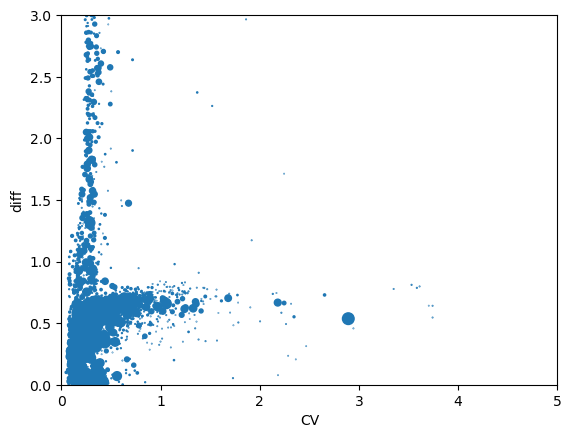

In [58]:
plt.scatter(CV,diff,np.array(H)/1000)
plt.xlabel('CV')
plt.ylabel('diff')
plt.axis([0, 5, 0, 3])

In [59]:
CV=[]
diff=[]
H=[]
for name in names:
    #print(name)
    cvs=all_cvs.get(get_code(name))
    hosp=get_pandemic(name)
    hosp_diff=calcDev(hosp)
    hosp=[hosp[20*i] for i in range(1,15)]
    for t in range(len(hosp)):
        if hosp[t]>10:
            CV.append(cvs[t])
            diff.append(hosp_diff[t])
            H.append(hosp[t])
print(len(CV))

/var/folders/vq/kbhqcbz52js6b8nz5zvnryc1fy9f2x/T/ipykernel_55014/878186148.py:7: RuntimeWarning: divide by zero encountered in scalar divide
  hosp_diff[i-1]=np.abs(hosp[20*i+d]-yl)/hosp[20*i+d] #+d
/var/folders/vq/kbhqcbz52js6b8nz5zvnryc1fy9f2x/T/ipykernel_55014/878186148.py:7: RuntimeWarning: invalid value encountered in scalar divide
  hosp_diff[i-1]=np.abs(hosp[20*i+d]-yl)/hosp[20*i+d] #+d
/var/folders/vq/kbhqcbz52js6b8nz5zvnryc1fy9f2x/T/ipykernel_55014/878186148.py:7: RuntimeWarning: divide by zero encountered in scalar divide
  hosp_diff[i-1]=np.abs(hosp[20*i+d]-yl)/hosp[20*i+d] #+d
/var/folders/vq/kbhqcbz52js6b8nz5zvnryc1fy9f2x/T/ipykernel_55014/878186148.py:7: RuntimeWarning: invalid value encountered in scalar divide
  hosp_diff[i-1]=np.abs(hosp[20*i+d]-yl)/hosp[20*i+d] #+d
/var/folders/vq/kbhqcbz52js6b8nz5zvnryc1fy9f2x/T/ipykernel_55014/878186148.py:7: RuntimeWarning: divide by zero encountered in scalar divide
  hosp_diff[i-1]=np.abs(hosp[20*i+d]-yl)/hosp[20*i+d] #+d
/var/fo

3453


/var/folders/vq/kbhqcbz52js6b8nz5zvnryc1fy9f2x/T/ipykernel_55014/878186148.py:7: RuntimeWarning: invalid value encountered in scalar divide
  hosp_diff[i-1]=np.abs(hosp[20*i+d]-yl)/hosp[20*i+d] #+d
/var/folders/vq/kbhqcbz52js6b8nz5zvnryc1fy9f2x/T/ipykernel_55014/878186148.py:7: RuntimeWarning: invalid value encountered in scalar divide
  hosp_diff[i-1]=np.abs(hosp[20*i+d]-yl)/hosp[20*i+d] #+d
/var/folders/vq/kbhqcbz52js6b8nz5zvnryc1fy9f2x/T/ipykernel_55014/878186148.py:7: RuntimeWarning: divide by zero encountered in scalar divide
  hosp_diff[i-1]=np.abs(hosp[20*i+d]-yl)/hosp[20*i+d] #+d
/var/folders/vq/kbhqcbz52js6b8nz5zvnryc1fy9f2x/T/ipykernel_55014/878186148.py:7: RuntimeWarning: invalid value encountered in scalar divide
  hosp_diff[i-1]=np.abs(hosp[20*i+d]-yl)/hosp[20*i+d] #+d
/var/folders/vq/kbhqcbz52js6b8nz5zvnryc1fy9f2x/T/ipykernel_55014/878186148.py:7: RuntimeWarning: invalid value encountered in scalar divide
  hosp_diff[i-1]=np.abs(hosp[20*i+d]-yl)/hosp[20*i+d] #+d
/var/fold

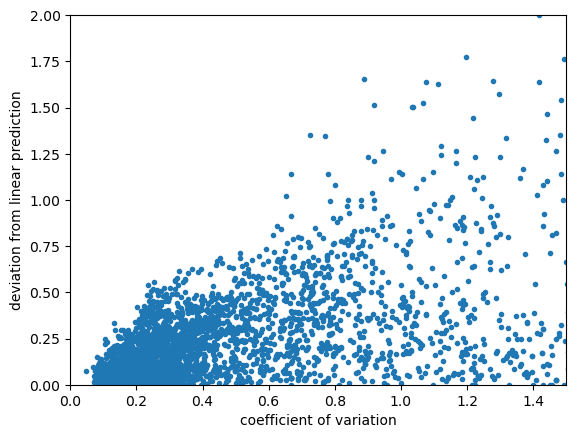

In [60]:
plt.plot(CV,diff,'.')
#plt.scatter(CV,diff,np.array(H)/1000)
plt.xlabel('coefficient of variation')
plt.ylabel('deviation from linear prediction')
plt.axis([0, 1.5, 0, 2])
plt.savefig('cv_dev.pdf')

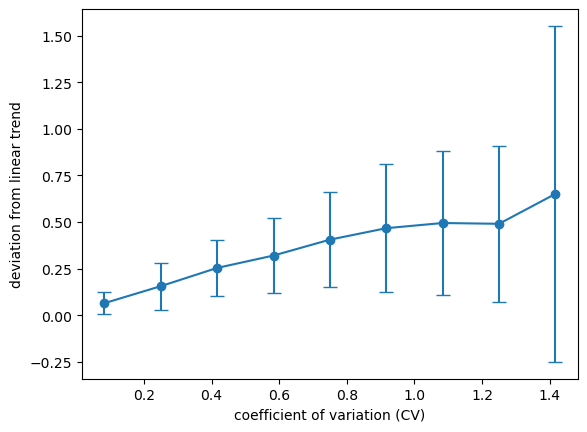

In [61]:
diff=np.array(diff)
CV=np.array(CV)
valid_mask = ~np.isnan(CV) & ~np.isnan(diff) & ~np.isinf(CV) & ~np.isinf(diff)

CV=CV[valid_mask]
diff=diff[valid_mask]

bin_edges = np.linspace(0, 1.5, num=10)
bin_indices = np.digitize(CV, bin_edges)

# Calculate the mean of y values for each bin
bin_means = [np.mean(diff[bin_indices == i]) for i in range(1, len(bin_edges))]
bin_stds = [np.std(diff[bin_indices == i],ddof=1) for i in range(1, len(bin_edges))]

# Compute the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plot the results
#plt.plot(bin_centers, bin_means, marker='o', linestyle='-')
plt.errorbar(bin_centers, bin_means, yerr=bin_stds, fmt='o-', capsize=5, label='Mean ± STD')
plt.xlabel('coefficient of variation (CV)')
plt.ylabel('deviation from linear trend')
plt.savefig('cv_dev.pdf')

In [62]:
CV=[]
MAPE=[]
H=[]
for name in names:
    #print(name)
    cvs=all_cvs.get(get_code(name))
    mape=all_mapes.get(get_code(name))
    hosp=get_pandemic(name)
    hosp=[hosp[20*i] for i in range(1,15)]
    for t in range(len(hosp)):
        if hosp[t]>10:
            CV.append(cvs[t])
            MAPE.append(mape[t])
            H.append(hosp[t])
print(len(CV))

3453


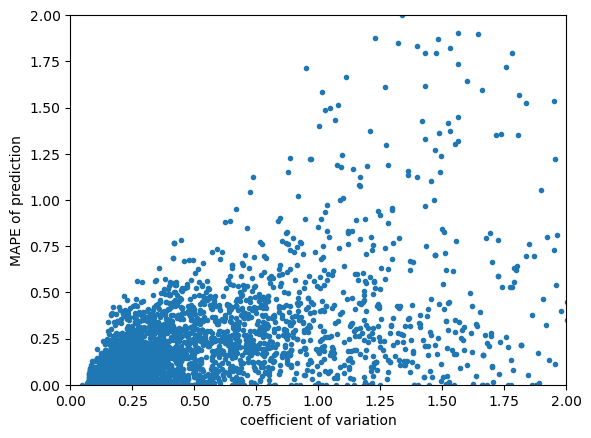

In [63]:
plt.plot(CV,MAPE,'.')
#plt.scatter(CV,diff,np.array(H)/1000)
plt.xlabel('coefficient of variation')
plt.ylabel('MAPE of prediction')
plt.axis([0, 2, 0, 2])
plt.savefig('cv_dev.pdf')

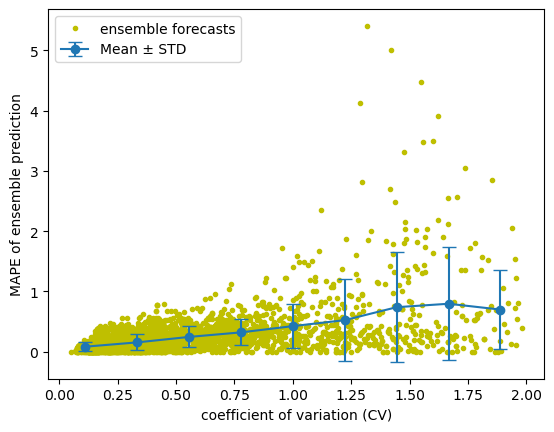

In [74]:
MAPE=np.array(MAPE)
CV=np.array(CV)
valid_mask = ~np.isnan(CV) & ~np.isnan(MAPE) & ~np.isinf(CV) & ~np.isinf(MAPE) & (CV>0) & (CV<2)

CV=CV[valid_mask]
MAPE=MAPE[valid_mask]

bin_edges = np.linspace(0, 2, num=10)
bin_indices = np.digitize(CV, bin_edges)

# Calculate the mean of y values for each bin
bin_means = [np.mean(MAPE[bin_indices == i]) for i in range(1, len(bin_edges))]
bin_stds = [np.std(MAPE[bin_indices == i],ddof=1) for i in range(1, len(bin_edges))]

# Compute the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plot the results
#plt.plot(bin_centers, bin_means, marker='o', linestyle='-')
plt.plot(CV,MAPE,'y.',label="ensemble forecasts")
plt.errorbar(bin_centers, bin_means, yerr=bin_stds, fmt='o-', capsize=5, label='Mean ± STD')
plt.xlabel('coefficient of variation (CV)')
plt.ylabel('MAPE of ensemble prediction')
#plt.axis([0, 2, -0.4, 2.2])
plt.legend(loc=2)
plt.savefig('CV_MAPE.pdf')


In [73]:
R = np.corrcoef(CV,MAPE)
print(R)

[[1.         0.50807217]
 [0.50807217 1.        ]]


Text(0, 0.5, 'count')

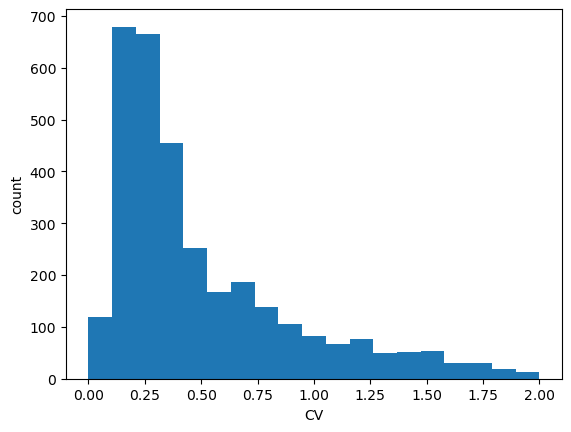

In [80]:
bin_edges = np.linspace(0, 2, num=20)
plt.hist(CV, bin_edges)
plt.xlabel('CV')
plt.ylabel('count')

In [83]:
log_X = np.log(CV)

# Step 2: Estimate parameters in log-space
mu_hat = np.mean(log_X)   # Estimate of mu (mean in log-space)
sigma_hat = np.std(log_X)  # Estimate of sigma (std in log-space)

# Step 3: Convert back to log-normal space
mean_hat = np.exp(mu_hat + (sigma_hat**2) / 2)
std_hat = np.sqrt((np.exp(sigma_hat**2) - 1) * np.exp(2 * mu_hat + sigma_hat**2))

# Print estimated parameters
print("Estimated log-space mean (mu):", mu_hat)
print("Estimated log-space std (sigma):", sigma_hat)
print("Estimated log-normal mean:", mean_hat)
print("Estimated log-normal std:", std_hat)

Estimated log-space mean (mu): -0.9800006906579027
Estimated log-space std (sigma): 0.7683623991756546
Estimated log-normal mean: 0.5041858633397099
Estimated log-normal std: 0.45227339766341496


Text(0, 0.5, 'count')

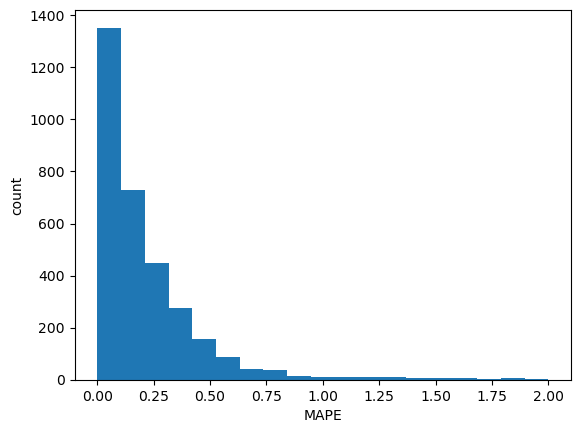

In [78]:
bin_edges = np.linspace(0, 2, num=20)
plt.hist(MAPE, bin_edges)
plt.xlabel('MAPE')
plt.ylabel('count')